In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score,accuracy_score

In [2]:
# Assuming the file path is correct
file_path = r"C:\Users\hp\Desktop\Data analysis\Python\Project\web scraping\British Airways\customer_bookings.csv"

# Importing data with specified encoding
try:
    data = pd.read_csv(file_path, encoding='latin1')
    # Check the first few rows to verify data import
    print(data.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print("An error occurred:", e)

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [3]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
# checking the total number of rows and columns
data.shape

(50000, 14)

In [5]:
# checking for missing data
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
# checking the statistical distribution of the numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [8]:
# checking the statistical distribution of the categorical features
data.describe(include=['bool','object']).T

,count,unique,top,freq
sales_channel,50000,2,Internet,44382
trip_type,50000,3,RoundTrip,49497
flight_day,50000,7,Mon,8102
route,50000,799,AKLKUL,2680
booking_origin,50000,104,Australia,17872


In [9]:
#function that calculates and adds percentages to graph plots
def plot_p(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(8, 3.5), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram   
    
    
    
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show();

In [10]:
for column in data.columns:
    print(data[column].value_counts())

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
purchase_lead
1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: count, Length: 470, dtype: int64
length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: count, Length: 335, dtype: int64
flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64
flight_day
Mon    8102
Wed

In [11]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


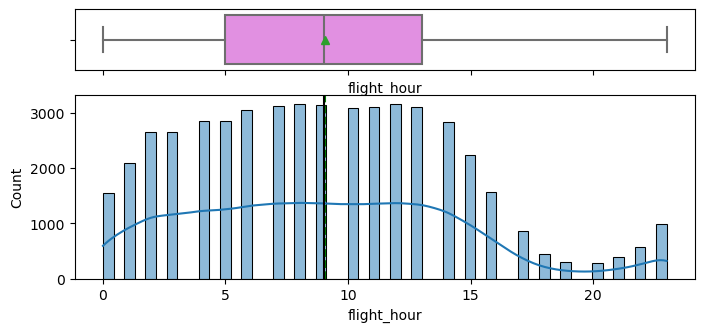

In [12]:
histogram_boxplot(data, 'flight_hour');

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


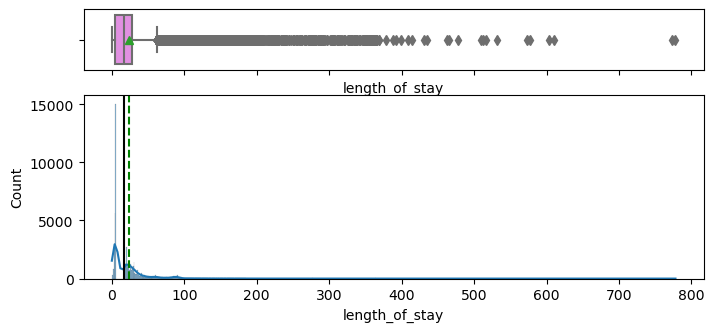

In [13]:
histogram_boxplot(data, 'length_of_stay');

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


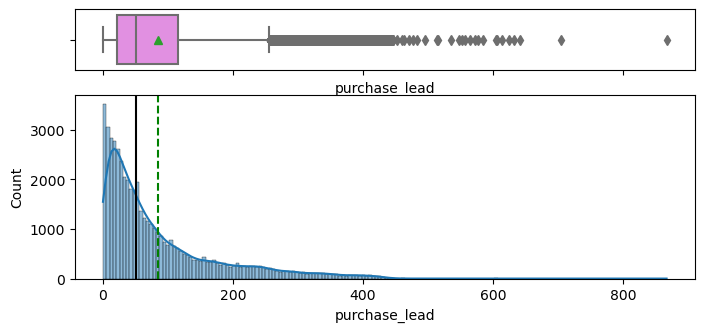

In [14]:
histogram_boxplot(data, 'purchase_lead');

In [15]:
for col in data.columns:
    print(data[col].value_counts())

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
purchase_lead
1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: count, Length: 470, dtype: int64
length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: count, Length: 335, dtype: int64
flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64
flight_day
Mon    8102
Wed

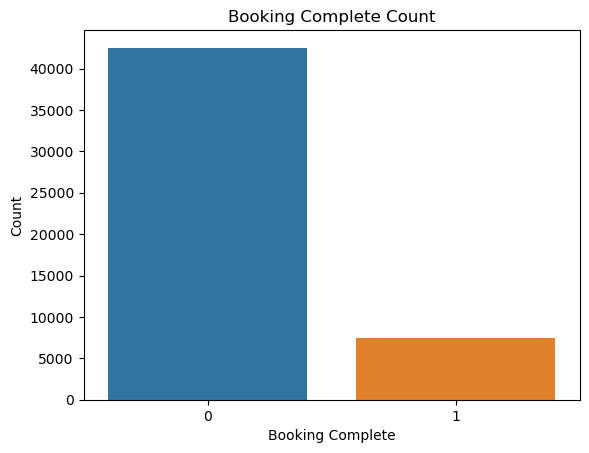

In [16]:
# Plot count plot for 'booking_complete' column
# Calculate the value counts for 'booking_complete' column
booking_complete_counts = data['booking_complete'].value_counts()

# Sort the counts in descending order
booking_complete_counts = booking_complete_counts.sort_values(ascending=False)

# Plot count plot for 'booking_complete' column
sns.countplot(data=data, x='booking_complete', order=booking_complete_counts.index)
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Booking Complete Count')
plt.show();

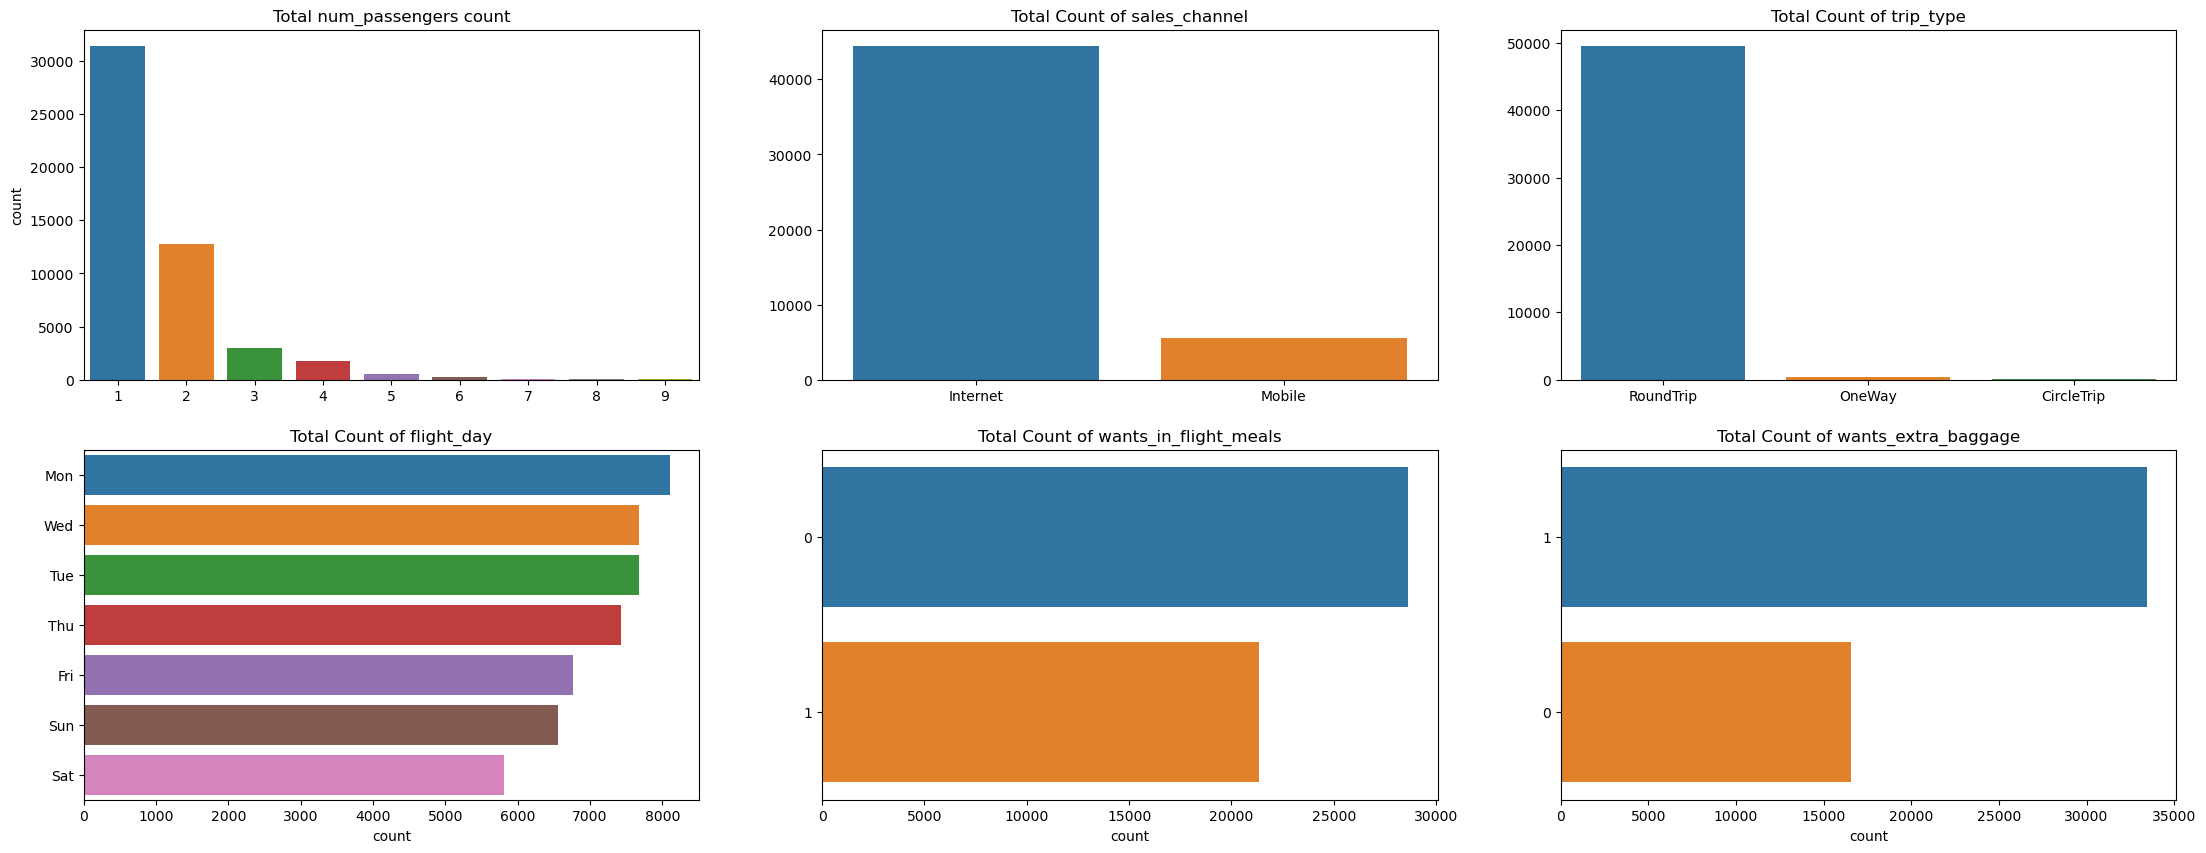

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.countplot(x='num_passengers', data=data, order=data['num_passengers'].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title('Total num_passengers count')
axs[0,0].set_xlabel('')

sns.countplot(x='sales_channel', data=data, order=data['sales_channel'].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title('Total Count of sales_channel')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.countplot(x='trip_type', data=data, order=data['trip_type'].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title('Total Count of trip_type')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.countplot(y='flight_day', data=data, order=data['flight_day'].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title('Total Count of flight_day')
axs[1,0].set_ylabel('')

sns.countplot(y='wants_in_flight_meals', data=data, order=data['wants_in_flight_meals'].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title('Total Count of wants_in_flight_meals')
axs[1,1].set_ylabel('')

sns.countplot(y='wants_extra_baggage', data=data, order=data['wants_extra_baggage'].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title('Total Count of wants_extra_baggage')
axs[1,2].set_ylabel('')

plt.show();

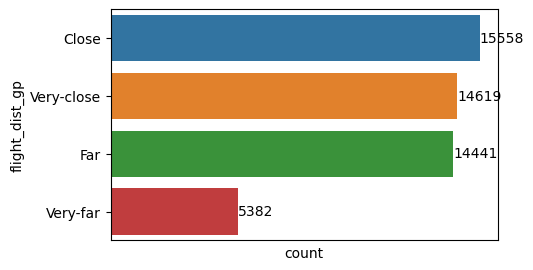

In [18]:
# creating an distance group bracket
def distance(x):
    if x <= 5:
        return 'Very-close'
    elif x <= 10:
        return 'Close'
    elif x <= 15:
        return 'Far'
    else:
        return 'Very-far'
    
data['flight_dist_gp'] = data['flight_hour'].apply(distance)

# visualize the count of each distance
plt.figure(figsize=(5,3))

ax = sns.countplot(y=data['flight_dist_gp'], order=data['flight_dist_gp'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=data['flight_dist_gp'].value_counts(ascending=False).values)
ax.xaxis.set_ticks([]);

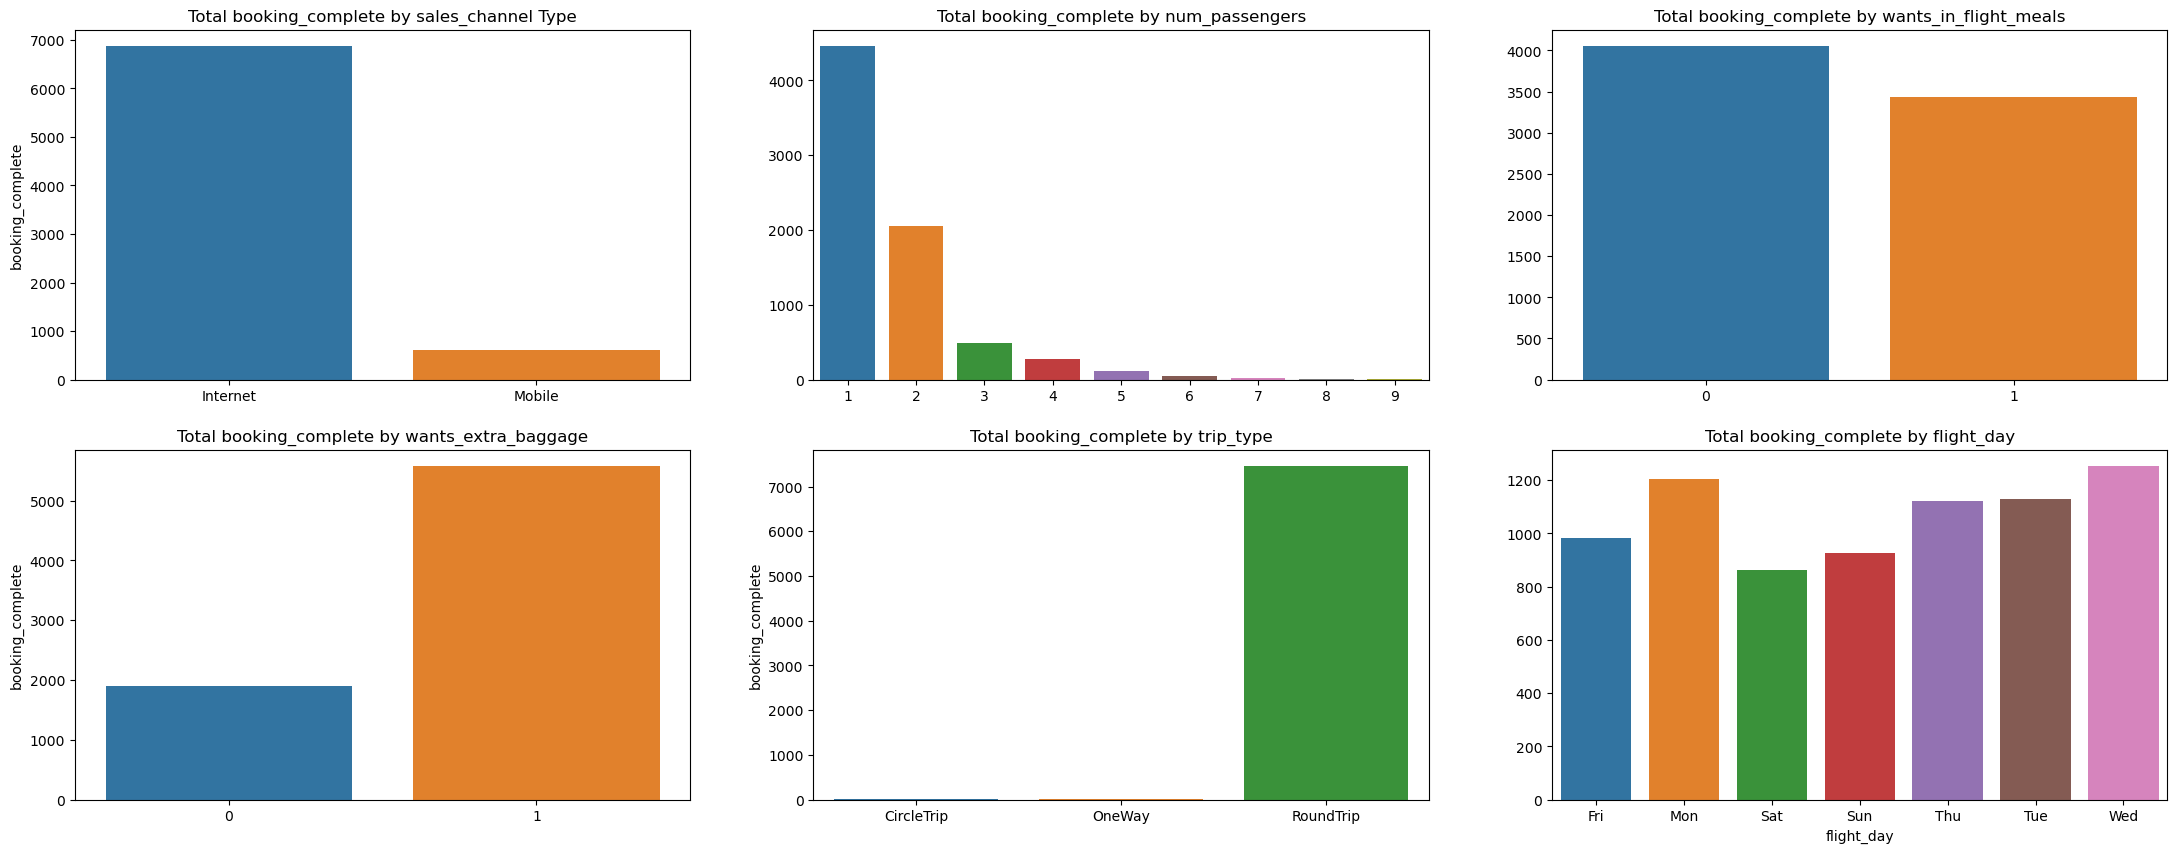

In [19]:
# Bivariate Analysis
# bivariate analysis for categorical variables - Attrition
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

age_att = data.groupby('sales_channel')['booking_complete'].sum().reset_index()
sns.barplot(x='sales_channel', data=age_att, y='booking_complete', ax=axs[0,0])
axs[0,0].set_title('Total booking_complete by sales_channel Type')
axs[0,0].set_xlabel('')

buss_att = data.groupby('num_passengers')['booking_complete'].sum().reset_index()
sns.barplot(x='num_passengers', data=buss_att, y='booking_complete', ax=axs[0,1])
axs[0,1].set_title('Total booking_complete by num_passengers')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

dept_att = data.groupby('wants_in_flight_meals')['booking_complete'].sum().reset_index()
sns.barplot(x='wants_in_flight_meals', data=dept_att, y='booking_complete', ax=axs[0,2])
axs[0,2].set_title('Total booking_complete by wants_in_flight_meals')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

ed_att = data.groupby('wants_extra_baggage')['booking_complete'].sum().reset_index()
sns.barplot(x='wants_extra_baggage', data=ed_att, y='booking_complete', ax=axs[1,0])
axs[1,0].set_title('Total booking_complete by wants_extra_baggage')
axs[1,0].set_xlabel('')

dist_att = data.groupby('trip_type')['booking_complete'].sum().reset_index()
sns.barplot(x='trip_type', data=dist_att, y='booking_complete', ax=axs[1,1])
axs[1,1].set_title('Total booking_complete by trip_type')
axs[1,1].set_xlabel('')

gen_att = data.groupby('flight_day')['booking_complete'].sum().reset_index()
sns.barplot(x='flight_day', data=gen_att, y='booking_complete', ax=axs[1,2])
axs[1,2].set_title('Total booking_complete by flight_day')
axs[1,2].set_ylabel('');

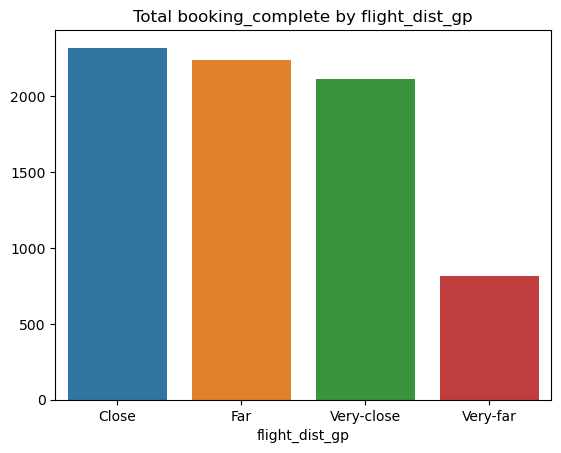

In [20]:
gen_att = data.groupby('flight_dist_gp')['booking_complete'].sum().reset_index()
sns.barplot(x='flight_dist_gp', data=gen_att, y='booking_complete')
plt.title('Total booking_complete by flight_dist_gp')
plt.ylabel('');

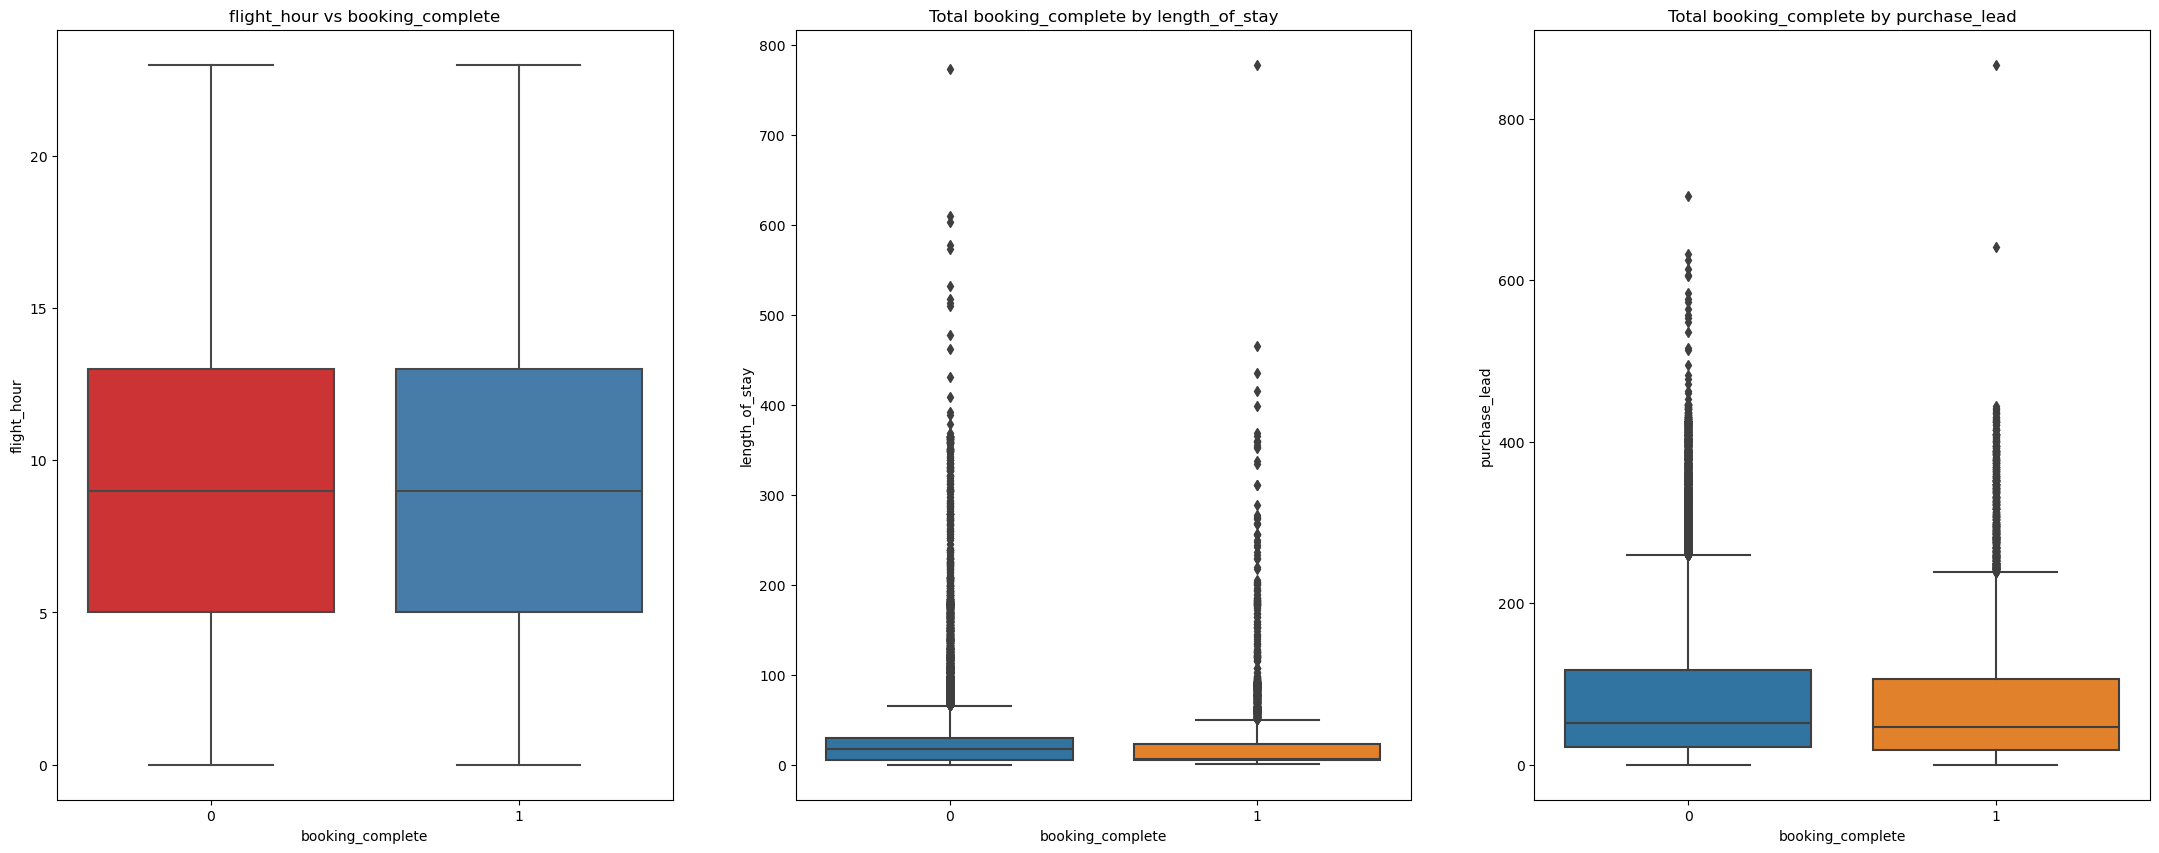

In [21]:
# bivariate analysis for numerical variables - attrition
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(27,10))

sns.boxplot(y='flight_hour', data=data, x='booking_complete', palette='Set1', ax=axs[0])
axs[0].set_title('flight_hour vs booking_complete')

sns.boxplot(y='length_of_stay', data=data, x='booking_complete', ax=axs[1])
axs[1].set_title('Total booking_complete by length_of_stay')

sns.boxplot(y='purchase_lead', data=data, x='booking_complete', ax=axs[2])
axs[2].set_title('Total booking_complete by purchase_lead');

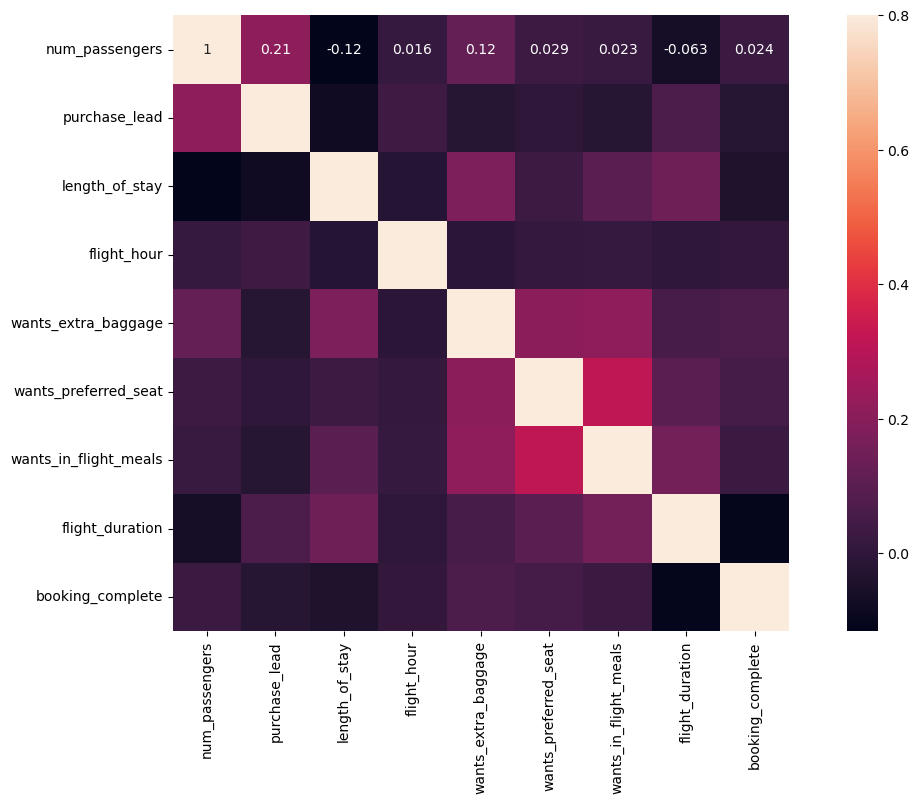

In [22]:
num_data = data.select_dtypes(include=['number'])

a = num_data.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True)
plt.show();

In [23]:
df = data.copy()
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [24]:
# handling data imbalance
booking_complete_no = df[df.booking_complete == 0]
booking_complete_yes = df[df.booking_complete == 1]

In [25]:
# undersampling the dataset inorder to handle data imbalance
sample = booking_complete_no.sample(n=7478)
# sample
# merging the legit-sample to fraud dataset
df2 = pd.concat((sample, booking_complete_yes), axis=0)

In [26]:
print(df2.shape)

(14956, 15)


In [27]:
df2.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_dist_gp
25748,1,Internet,RoundTrip,7,2,19,Fri,CGKMEL,Kuwait,1,0,0,8.83,0,Very-far
7602,1,Mobile,RoundTrip,37,17,15,Wed,CTUSIN,Singapore,1,1,1,4.72,0,Far
13728,1,Internet,RoundTrip,7,75,15,Wed,ICNMEL,South Korea,1,0,0,8.83,0,Far


In [28]:
# Create a dictionary mapping names to numeric values

day_map = {'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6}
# Use the map function to replace day names with corresponding numbers
df2['flight_day'] = df2['flight_day'].map(day_map)

df2.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_dist_gp
25748,1,Internet,RoundTrip,7,2,19,5,CGKMEL,Kuwait,1,0,0,8.83,0,Very-far
7602,1,Mobile,RoundTrip,37,17,15,3,CTUSIN,Singapore,1,1,1,4.72,0,Far
13728,1,Internet,RoundTrip,7,75,15,3,ICNMEL,South Korea,1,0,0,8.83,0,Far
22212,1,Internet,RoundTrip,14,30,6,5,OOLXIY,China,1,0,0,8.83,0,Close
32467,2,Internet,RoundTrip,254,4,15,3,HNDSIN,Japan,0,1,0,7.57,0,Far


In [29]:
#store the label for supervised learning
y = df2['booking_complete']
x = df2.drop('booking_complete', axis=1)

In [30]:
x.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_dist_gp
25748,1,Internet,RoundTrip,7,2,19,5,CGKMEL,Kuwait,1,0,0,8.83,Very-far
7602,1,Mobile,RoundTrip,37,17,15,3,CTUSIN,Singapore,1,1,1,4.72,Far
13728,1,Internet,RoundTrip,7,75,15,3,ICNMEL,South Korea,1,0,0,8.83,Far


In [31]:
# convert categorial columns to numerical columns
encoder = LabelEncoder()  # method initialize

# looping through the columns in the dataset
for c in x.columns[:]:
    if(x[c].dtype == 'object'):
        x[c] = encoder.fit_transform(x[c])
    else:
        x[c] = x[c]

In [32]:
x.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_dist_gp
25748,1,0,2,7,2,19,5,90,34,1,0,0,8.83,3
7602,1,1,2,37,17,15,3,197,60,1,1,1,4.72,1
13728,1,0,2,7,75,15,3,367,63,1,0,0,8.83,1


#drop categorical columns now
df2.drop(['sales_channel', 'trip_type','booking_origin', 'route', 'flight_dist_gp'], axis=1, inplace = True)

In [33]:
y

25748    0
7602     0
13728    0
22212    0
32467    0
        ..
49972    1
49977    1
49980    1
49984    1
49987    1
Name: booking_complete, Length: 14956, dtype: int64

In [34]:
#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(x)

#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = x.columns)

# add the labels back to the dataframe
scaled_df['target']  = y.values

scaled_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_dist_gp,target
0,-0.590250,-0.330403,0.084318,-0.840479,-0.582996,1.854709,1.099260,-1.224568,0.140795,0.659159,-0.688639,-0.881288,1.122546,1.819797,0
1,-0.590250,3.026603,0.084318,-0.508828,-0.131227,1.104158,0.053558,-0.691453,1.250268,0.659159,1.452140,1.134702,-1.582276,-0.188162,0
2,-0.590250,-0.330403,0.084318,-0.840479,1.615611,1.104158,0.053558,0.155552,1.378285,0.659159,-0.688639,-0.881288,1.122546,-0.188162,0
3,-0.590250,-0.330403,0.084318,-0.763094,0.260306,-0.584580,1.099260,1.341360,-0.797989,0.659159,-0.688639,-0.881288,1.122546,-1.192142,0
4,0.359076,-0.330403,0.084318,1.890118,-0.522760,1.104158,0.053558,0.065869,0.012779,-1.517084,1.452140,-0.881288,0.293330,-0.188162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14951,-0.590250,-0.330403,0.084318,-0.553048,-0.462524,-0.584580,0.053558,1.416095,1.591645,0.659159,1.452140,-0.881288,-1.615182,-1.192142,1
14952,0.359076,-0.330403,0.084318,-0.752039,-0.462524,1.291796,-0.469294,1.416095,0.268812,0.659159,1.452140,1.134702,-1.615182,1.819797,1
14953,2.257728,-0.330403,0.084318,1.757457,-0.462524,-0.021667,-0.469294,1.426060,0.268812,0.659159,-0.688639,1.134702,-1.398006,-1.192142,1
14954,0.359076,-0.330403,0.084318,-0.840479,-0.462524,-0.959855,0.053558,1.431042,-1.224710,-1.517084,-0.688639,-0.881288,-0.989979,0.815817,1


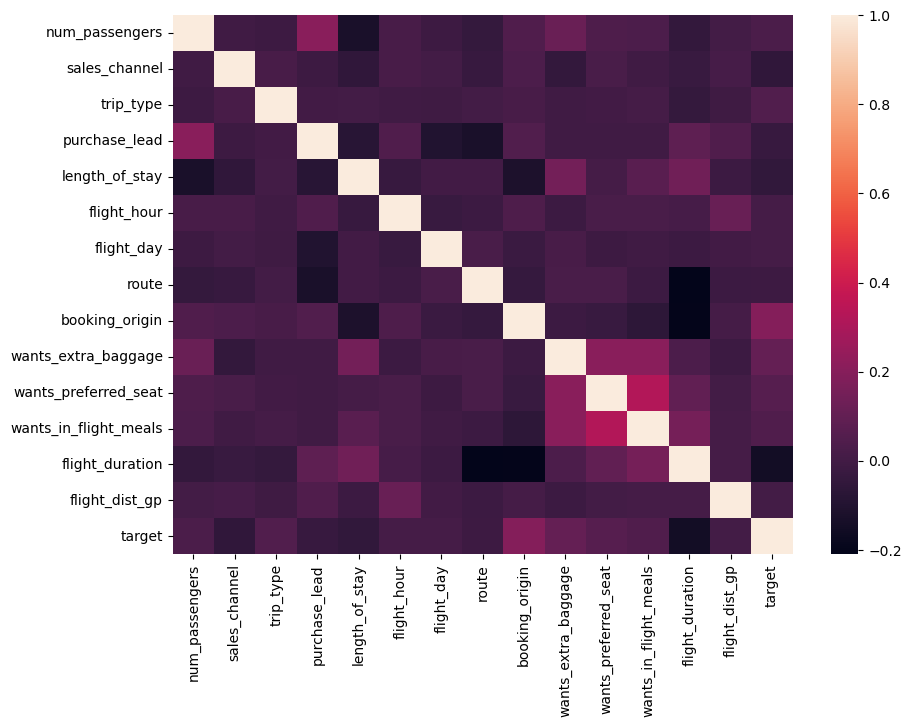

In [35]:
a = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(a);

In [36]:
x2 = scaled_df.drop(columns=['target'], axis=1)
y2 = scaled_df['target']

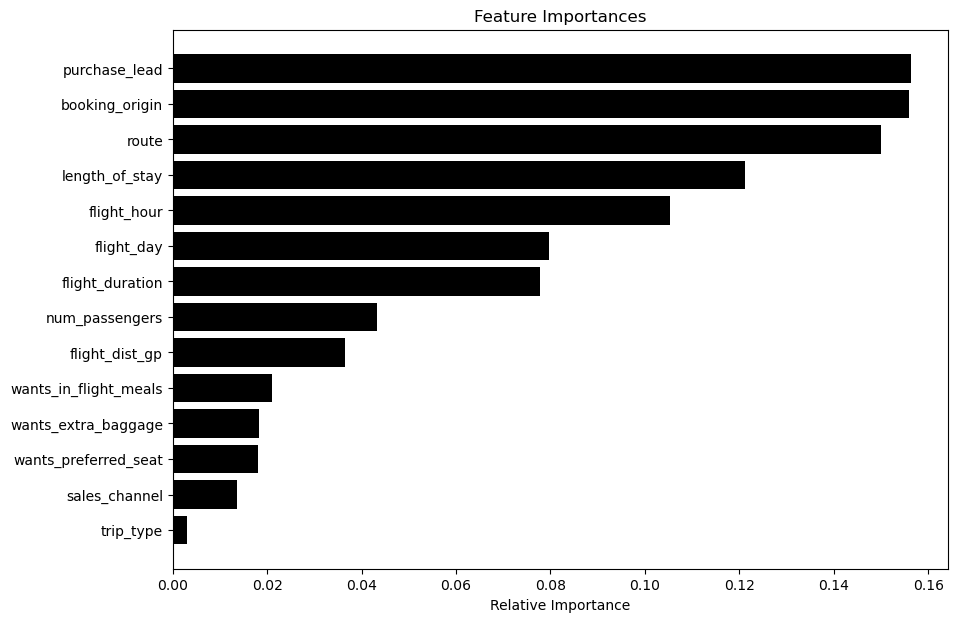

In [37]:
#plotting a feature importance chart for the data
model = RandomForestClassifier()
# fit the model
model.fit(x2, y2)
feature_names = list(x2.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='black', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show();

In [38]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform hyperparameter optimization
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7002005347593583
F1 Score: 0.712223291626564
ROC AUC Score: 0.7011384054278742
Precision: 0.6739526411657559
Recall: 0.7551020408163265


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67      1522
           1       0.66      0.77      0.71      1470

    accuracy                           0.69      2992
   macro avg       0.70      0.69      0.69      2992
weighted avg       0.70      0.69      0.69      2992



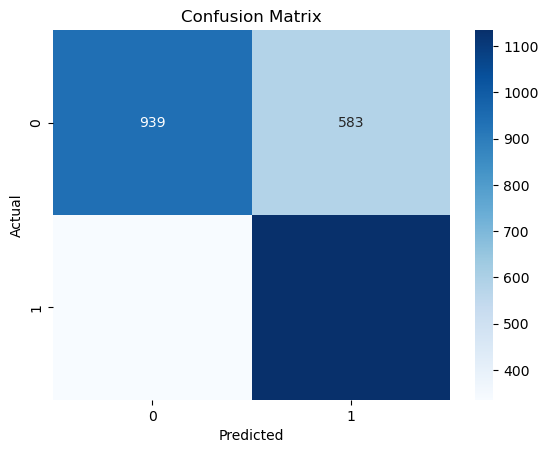

Confusion Matrix:
[[ 939  583]
 [ 336 1134]]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Model building for Random Forest Classifier
rfc = RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200)

# Train the model
rfc.fit(x_train, y_train)

# Predict on the test set
y_pred = rfc.predict(x_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
lcm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(lcm);